In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

In [2]:
sheet = pd.read_excel(
    "count.ods",
    sheet_name="Sheet1",
    header=int(0),
    usecols="A:D"
)
sheet

,year,applied,mooc,finished
0,2020,1900,1650.0,1392.25
1,2021,2000,1700.0,1449.50
2,2022,2300,1800.0,1600.00
3,2023,2500,2100.0,1800.00
4,2024,3000,NaN,2100.00


In [3]:
dataX=list(sheet.year.iloc)
dataY=list(sheet.finished.iloc)

In [4]:
range1=np.linspace(dataX[0]-1,dataX[-1]+2,1000)

In [5]:
fncPoly = lambda x,b,c,d:b*x**2+c*x+d
fitPoly = curve_fit(
    fncPoly,
    dataX,
    dataY
)[0]
fncFitPoly = lambda x:fncPoly(x,*fitPoly)
fitPolyX = range1
fitPolyY = list(map(fncFitPoly,range1))

r2_poly = r2_score(
    dataY,
    list(map(fncFitPoly,dataX))
)

print(fitPoly)
print(r2_poly)

[ 3.82142869e+01 -1.54361976e+05  1.55883007e+08]
0.9996045827333843


In [6]:
fncGrowth = lambda x,a,b:a*b**(x-dataX[2])
fitGrowth = curve_fit(
    fncGrowth,
    dataX,
    dataY,
    p0=[1,1.14],
    maxfev=10000
)[0]
fncFitGrowth = lambda x:fncGrowth(x,*fitGrowth)
fitGrowthX = range1
fitGrowthY = list(map(
    fncFitGrowth,
    range1
))

r2_growth=r2_score(
    dataY,
    list(map(fncFitGrowth,dataX))
)

print(fitGrowth)
print(r2_growth)

[1.64821516e+03 1.11520740e+00]
0.9651493825766054


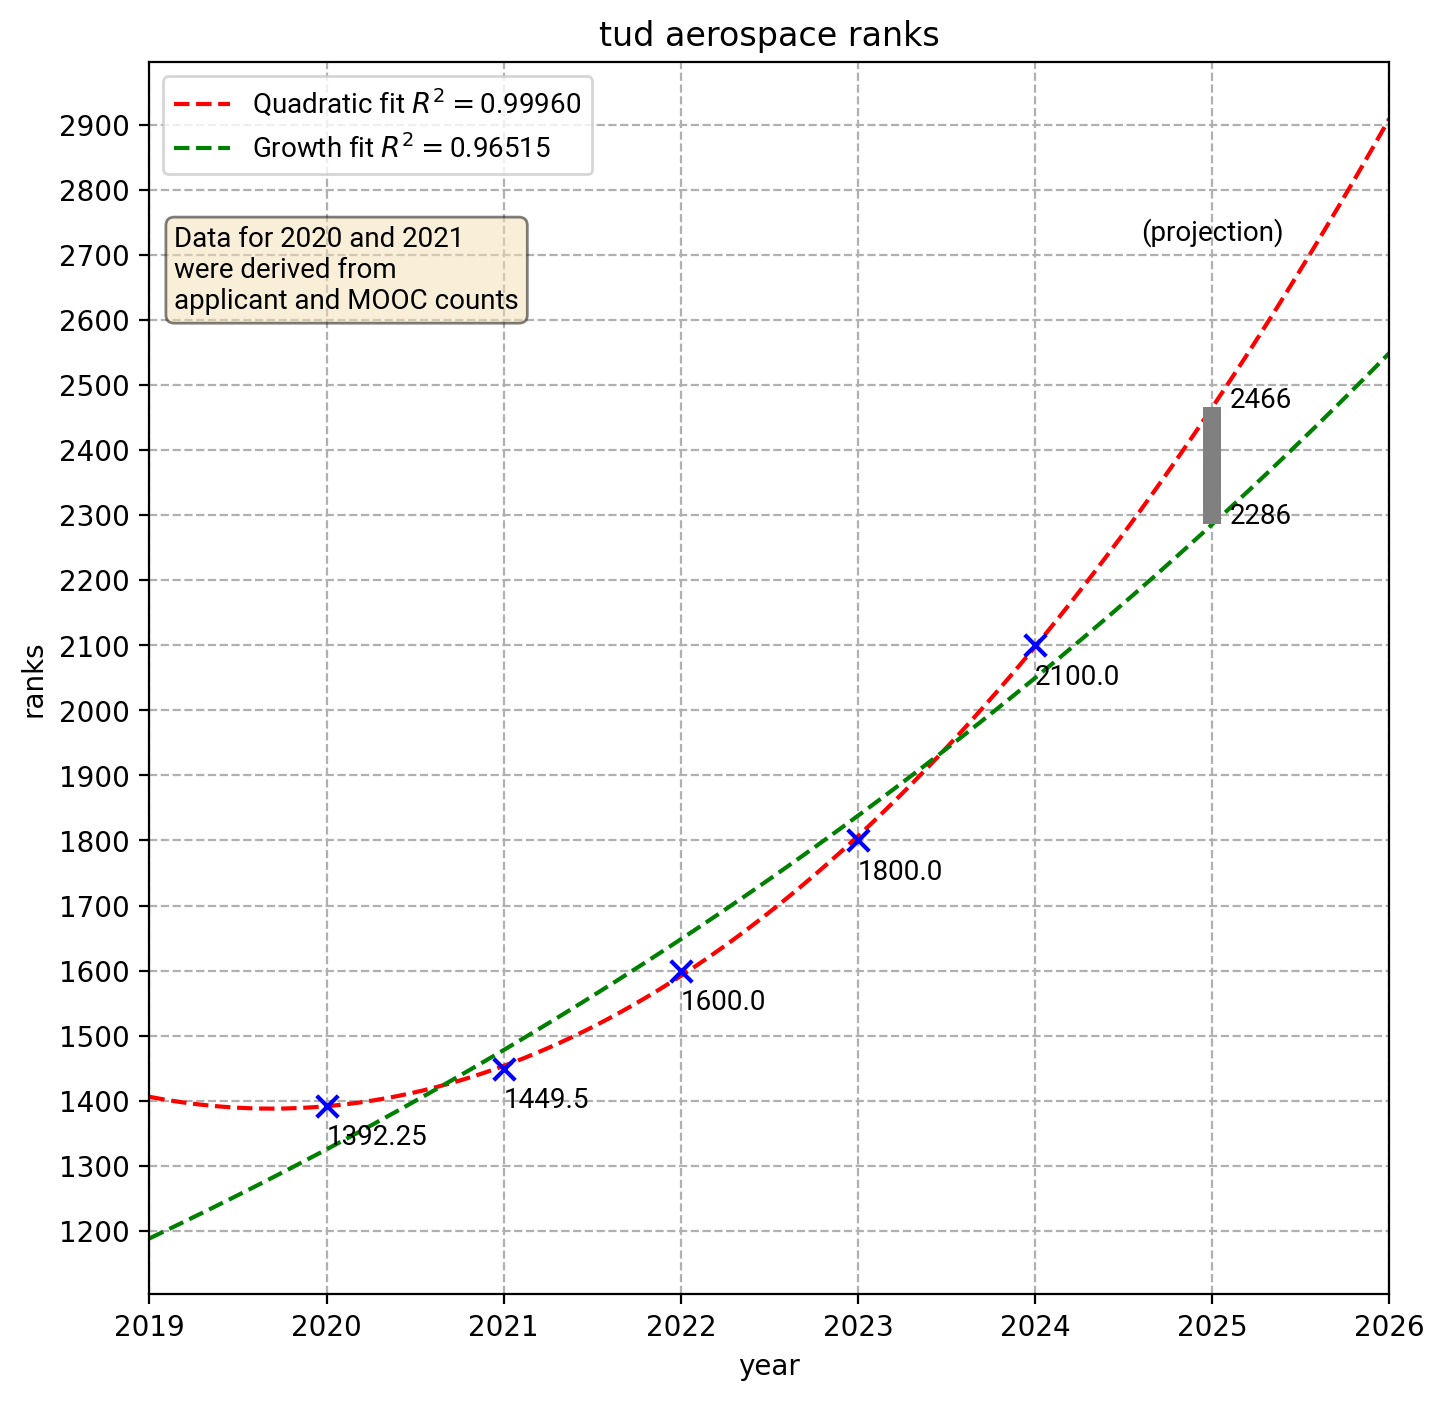

In [7]:
fig,ax = plt.subplots(figsize=(8, 8),dpi=200)
matplotlib.rcParams['font.family'] = "Roboto"
matplotlib.rcParams['font.size'] = 10
# matplotlib.rcParams['text.antialiased'] = False
# matplotlib.rcParams["lines.antialiased"] = False
# matplotlib.rcParams["patch.antialiased"] = False

plt.plot(
    fitPolyX,
    fitPolyY,
    label=f"Quadratic fit $R^2=${r2_poly:.5f}",
    linestyle="--",
    # linewidth=1,
    color="red",
)
plt.plot(
    fitGrowthX,
    fitGrowthY,
    label=f"Growth fit $R^2=${r2_growth:.5f}",
    linestyle="--",
    # linewidth=1,
    color="green",
)

plt.scatter(
    dataX,
    dataY,
    marker="x",
    color="blue",
    s=60.0,
    zorder=10)
for i,_ in enumerate(dataX):
    plt.annotate(
        dataY[i],
        (dataX[i],dataY[i]-60)
    )

plt.bar(
    2025,
    fncFitPoly(dataX[-1]+1)-fncFitGrowth(dataX[-1]+1),
    bottom=fncFitGrowth(dataX[-1]+1),
    width=0.1,
    color="grey",
    zorder=10
)
plt.annotate(
    int(np.round(fncFitPoly(dataX[-1]+1))),
    (dataX[-1]+1.1,fncFitPoly(dataX[-1]+1))
)
plt.annotate(
    int(np.round(fncFitGrowth(dataX[-1]+1))),
    (dataX[-1]+1.1,fncFitGrowth(dataX[-1]+1))
)
plt.annotate(
    "(projection)",
    (dataX[-1]+1,fncFitPoly(dataX[-1]+1)+(fncFitPoly(dataX[-1]+1)-fncFitPoly(dataX[-1]))*0.7),
    ha="center"
)
plt.xlabel("year")
plt.ylabel("ranks")
plt.title("tud aerospace ranks")
# plt.yticks(np.arange(1200,3000,100))
ax.yaxis.set_major_locator(ticker.MultipleLocator(100))
plt.grid(linestyle='--')
plt.legend()
plt.text(0.02,0.8,
    "Data for 2020 and 2021 \nwere derived from \napplicant and MOOC counts",
    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
    transform=ax.transAxes
    )
plt.xlim(dataX[0]-1,dataX[-1]+2)
# plt.xlim(2000,2030)
# plt.ylim(1250,3000)
plt.show()